In [53]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
def clean_data(path):
    df = pd.read_csv(path)
    df.dropna(inplace=True)
    phone_df = pd.get_dummies(df['phone'])
    city_df = pd.get_dummies(df['city'])
    df['Astapor'] = city_df['Astapor']
    df["King's Landing"] = city_df["King's Landing"]
    df['Winterfell'] = city_df['Winterfell']
    df['Android'] = phone_df['Android']
    df['iPhone'] = phone_df['iPhone']
    df.drop('phone',axis=1,inplace=True)
    df.drop('city',axis=1,inplace=True)
    df['signup_date'] = pd.to_datetime(df['signup_date'])
    df['day_of_week'] = df['signup_date'].apply(lambda x: x.dayofweek)
    df['signup_weekend'] = df['day_of_week'].apply(lambda x: x > 4)
    df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
    df['churn'] = df['last_trip_date'].apply(lambda x: x < pd.to_datetime('2014-06-01')).astype(int)
    df['luxury_car_user'] = df['luxury_car_user']*1
    df['signup_weekend'] = df['signup_weekend']*1
    df['avg_total_rating'] = df['avg_rating_by_driver'] + df['avg_rating_of_driver']
    df.drop(columns = ['Android', 'Astapor', 'last_trip_date', 'signup_date', 'day_of_week'],inplace=True)
    return df

In [13]:
df = clean_data('ride-share/data/churn_train.csv')

In [14]:
df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,King's Landing,Winterfell,iPhone,signup_weekend,churn,avg_total_rating
0,6.94,5.0,5.0,1.00,0.0,0,0,100.0,0,0,0,1,1,10.0
1,8.06,5.0,5.0,1.00,0.0,2,1,0.0,0,0,0,1,1,10.0
6,4.87,4.7,4.0,1.00,0.0,0,0,66.7,0,0,0,1,1,8.7
7,1.78,4.0,5.0,1.00,0.0,3,0,0.0,0,1,1,1,1,9.0
8,6.87,5.0,4.7,1.00,0.0,3,0,66.7,0,0,0,0,1,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2.06,4.8,4.3,1.08,9.5,8,0,90.5,0,1,0,1,1,9.1
39996,2.05,5.0,5.0,1.00,0.0,2,0,85.7,1,0,1,0,1,10.0
39997,3.04,5.0,5.0,1.00,0.0,3,1,33.3,0,1,0,1,0,10.0
39998,3.49,4.3,3.3,1.50,40.0,5,0,60.0,0,0,1,0,1,7.6


In [55]:
y = df['churn']
X = df.drop(columns = ['churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
y_train = df['churn']
X_train = df.drop(columns = ['churn'])

In [57]:
rf = RandomForestClassifier(n_estimators=30, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
rf.score(X_train, y_train)

0.996438488470361

In [59]:
rf.oob_score_

0.7427864300374261

In [24]:
random_forest_grid = {'max_depth': [3, None],
                        'max_features': ['sqrt', 'log2', None],
                        'min_samples_split': [2, 4],
                        'min_samples_leaf': [1, 2, 4],
                        'bootstrap': [True, False],
                        'n_estimators': [10, 20, 40, 80],
                        'random_state': [1]}

model_gridsearch = GridSearchCV(RandomForestClassifier(),
                                    random_forest_grid,
                                    n_jobs=-1,
                                    verbose=True,
                                    scoring='neg_mean_squared_error')
model_gridsearch.fit(X, y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  4.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_sco...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [61]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [26]:
best_params = model_gridsearch.best_params_ 
best_params

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 40,
 'random_state': 1}

In [27]:
model_best = model_gridsearch.best_estimator_
model_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [29]:
model_best.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [30]:
model_best.score(X, y)

0.8690993601352167

Feature ranking:
1. feature 0 (0.135344)
2. feature 1 (0.133002)
3. feature 7 (0.130899)
4. feature 4 (0.116142)
5. feature 8 (0.093993)
6. feature 3 (0.075672)
7. feature 12 (0.066330)
8. feature 5 (0.065305)
9. feature 10 (0.060410)
10. feature 6 (0.048864)
11. feature 2 (0.042779)
12. feature 9 (0.018345)
13. feature 11 (0.012916)
------------------------------
Feature headers:
feature 0: avg_dist
feature 1: avg_rating_by_driver
feature 2: avg_rating_of_driver
feature 3: avg_surge
feature 4: surge_pct
feature 5: trips_in_first_30_days
feature 6: luxury_car_user
feature 7: weekday_pct
feature 8: King's Landing
feature 9: Winterfell
feature 10: iPhone
feature 11: signup_weekend
feature 12: avg_total_rating


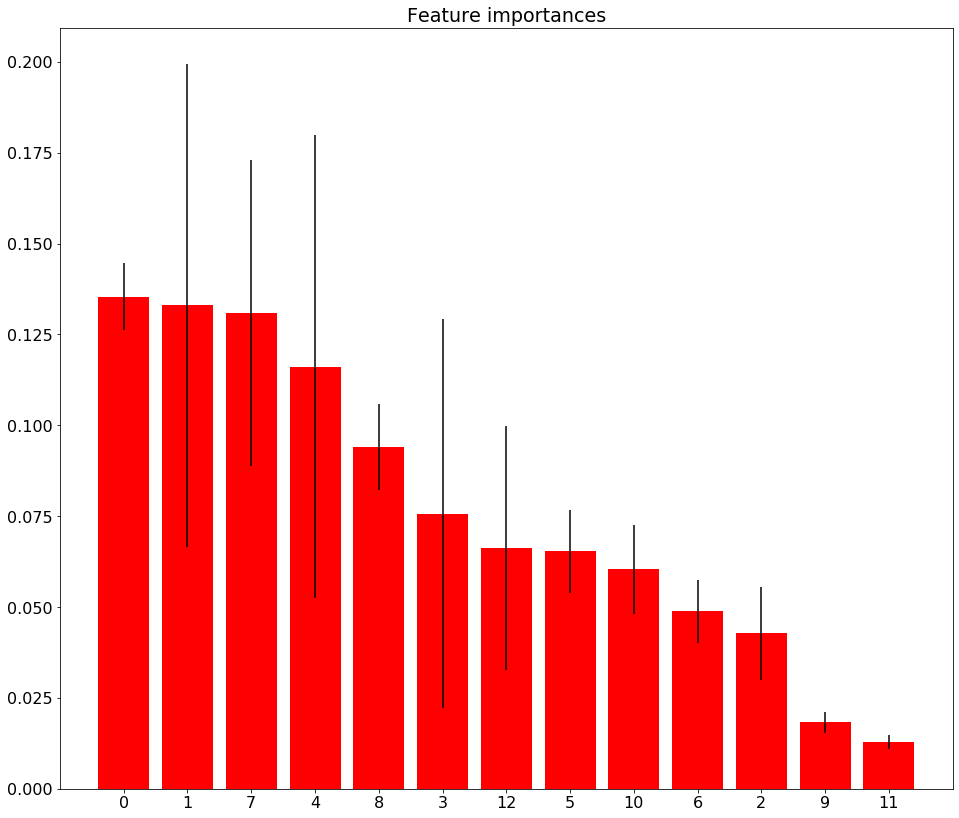

In [48]:
model_best.fit(X,y)
importances = model_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_best.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
    
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

print('------------------------------')
print('Feature headers:')
    
headers = list(X.columns.values)
for idx, val in enumerate(headers):
    print(f'feature {idx}:', val)

# Plot the feature importances of the forest
plt.figure(figsize = (16,14))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [34]:
X

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,King's Landing,Winterfell,iPhone,signup_weekend,avg_total_rating
0,6.94,5.0,5.0,1.00,0.0,0,0,100.0,0,0,0,1,10.0
1,8.06,5.0,5.0,1.00,0.0,2,1,0.0,0,0,0,1,10.0
6,4.87,4.7,4.0,1.00,0.0,0,0,66.7,0,0,0,1,8.7
7,1.78,4.0,5.0,1.00,0.0,3,0,0.0,0,1,1,1,9.0
8,6.87,5.0,4.7,1.00,0.0,3,0,66.7,0,0,0,0,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2.06,4.8,4.3,1.08,9.5,8,0,90.5,0,1,0,1,9.1
39996,2.05,5.0,5.0,1.00,0.0,2,0,85.7,1,0,1,0,10.0
39997,3.04,5.0,5.0,1.00,0.0,3,1,33.3,0,1,0,1,10.0
39998,3.49,4.3,3.3,1.50,40.0,5,0,60.0,0,0,1,0,7.6


In [36]:
X['iPhone'].sum()/len(X['iPhone'])

0.707412773149825

In [42]:
headers = list(X.columns.values)
for idx, val in enumerate(headers):
    print(f'feature {idx}:', val)

feature 0: avg_dist
feature 1: avg_rating_by_driver
feature 2: avg_rating_of_driver
feature 3: avg_surge
feature 4: surge_pct
feature 5: trips_in_first_30_days
feature 6: luxury_car_user
feature 7: weekday_pct
feature 8: King's Landing
feature 9: Winterfell
feature 10: iPhone
feature 11: signup_weekend
feature 12: avg_total_rating


features = headers
plot_partial_dependence(model_best, X, headers) 
fig = plt.gcf()
fig.suptitle('Partial dependence of house value on non-location features\n'
             'for the California housing dataset, with MLPRegressor')
fig.subplots_adjust(hspace=0.3)

Feature ranking:
1. feature 0 (0.135344)
2. feature 1 (0.133002)
3. feature 7 (0.130899)
4. feature 4 (0.116142)
5. feature 8 (0.093993)
6. feature 3 (0.075672)
7. feature 12 (0.066330)
8. feature 5 (0.065305)
9. feature 10 (0.060410)
10. feature 6 (0.048864)
11. feature 2 (0.042779)
12. feature 9 (0.018345)
13. feature 11 (0.012916)
------------------------------
Feature headers:
feature 0: avg_dist
feature 1: avg_rating_by_driver
feature 2: avg_rating_of_driver
feature 3: avg_surge
feature 4: surge_pct
feature 5: trips_in_first_30_days
feature 6: luxury_car_user
feature 7: weekday_pct
feature 8: King's Landing
feature 9: Winterfell
feature 10: iPhone
feature 11: signup_weekend
feature 12: avg_total_rating


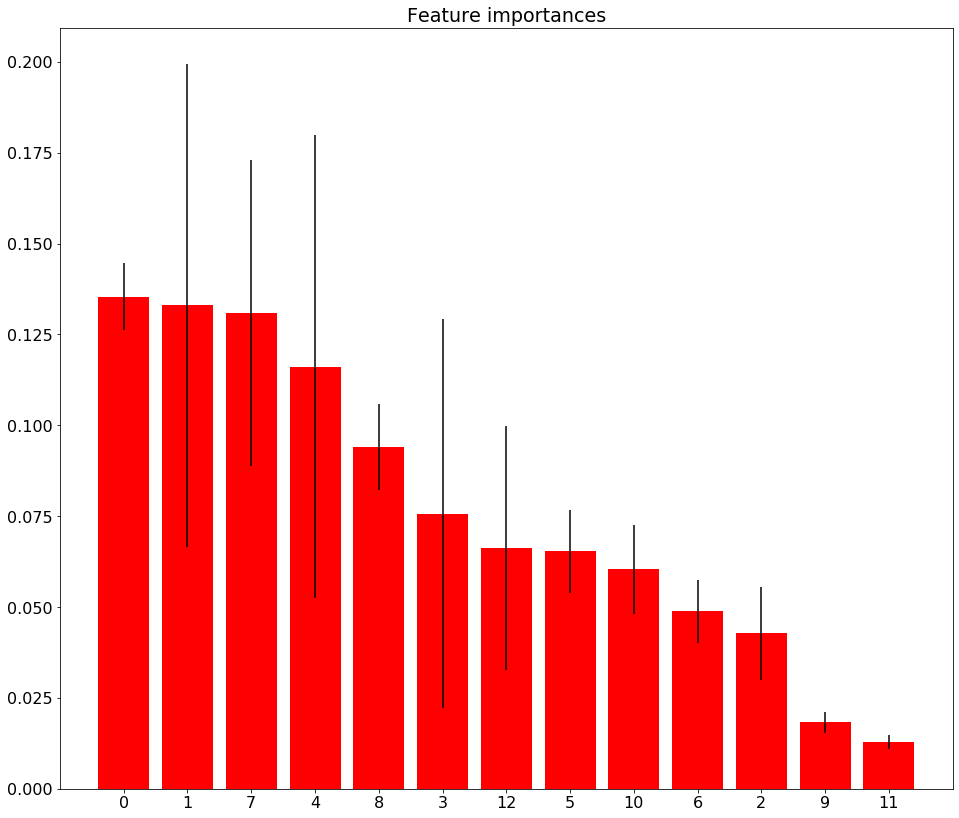

In [62]:
rfc.fit(X,y)
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
    
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

print('------------------------------')
print('Feature headers:')
    
headers = list(X.columns.values)
for idx, val in enumerate(headers):
    print(f'feature {idx}:', val)

# Plot the feature importances of the forest
plt.figure(figsize = (16,14))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [63]:
y_preds = rfc.predict(X_test)
recall = recall_score(y_test, y_preds)
recall

0.9206842923794712